### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk .corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

### Importing the required dataset

In [2]:
df=pd.read_csv("emotion_dataset/emotion-labels-train.csv")

In [3]:
df.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [4]:
##checking the missing  values
df.isnull().sum()

text     0
label    0
dtype: int64

<AxesSubplot:>

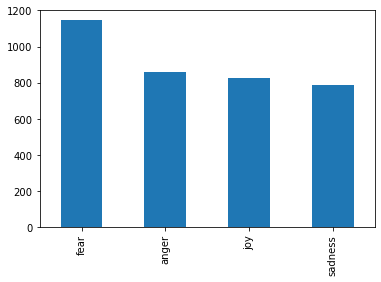

In [5]:
df.label.value_counts().plot.bar()

In [6]:
corpus=[]
ps=WordNetLemmatizer()
for i in range(0, len(df['text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
corpus

['got back seeing garydelaney burslem amazing face still hurt laughing much hilarious',
 'oh dear evening absolute hilarity think laughed much long time',
 'waiting week game cheer friday',
 'gardiner love thank much gloria sweet thoughtful made day joyful love',
 'feel blessed work family nanny nothing love amp appreciation make smile',
 'today reached subscriber yt goodday thankful',
 'singaholic good morning love happy first day fall let make awesome autumnmemories annabailey laughter smile',
 'bridgetjonesbaby best thing seen age funny missed bridget love teammark',
 'got back seeing garydelaney burslem amazing face still hurt laughing much',
 'indymn thought holiday could get cheerful met thenicebot',
 'still happy na blast',
 'meant happy happy',
 'yeah paul glorious bb',
 'morning started amazing hopefully whole day going want go n greatday',
 'cailamarsai whole time watching black ishabc lost glass hilarious mrbabyboogaloo',
 'iamtinadatta love much smile',
 'wyowiseguy livingv

In [8]:
x=corpus

In [9]:
y=df.iloc[:,-1]

In [10]:
y

0           joy
1           joy
2           joy
3           joy
4           joy
         ...   
3608    sadness
3609    sadness
3610    sadness
3611    sadness
3612    sadness
Name: label, Length: 3613, dtype: object

In [11]:
y.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [12]:
y.replace(("fear","anger","joy","sadness"),(0,1,2,3),inplace=True)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

x=cv.fit_transform(corpus).toarray()

print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.8589211618257261
confusion_matrix [[218   5   3  12]
 [  9 130   2  10]
 [ 11   5 158   3]
 [ 21  14   7 115]]


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.8298755186721992
confusion_matrix [[222   2   2  12]
 [ 24 118   0   9]
 [ 26   1 148   2]
 [ 26  15   4 112]]


### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.8091286307053942
confusion_matrix [[207   9   7  15]
 [ 26 111   2  12]
 [ 22   2 149   4]
 [ 21  11   7 118]]


### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.48409405255878285
confusion_matrix [[114  46  36  42]
 [ 19  88  16  28]
 [ 34  36  76  31]
 [ 28  33  24  72]]


### xgboost

In [19]:
import xgboost

from xgboost import XGBClassifier

classifier=XGBClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.8271092669432918
confusion_matrix [[221   4   1  12]
 [ 31 113   0   7]
 [ 26   1 150   0]
 [ 29  10   4 114]]


### Term Frequency Inverse Document Frequency

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()

x=tf.fit_transform(corpus).toarray()

print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Logistc Regression

In [31]:
from sklearn.linear_model import LogisticRegression
final=LogisticRegression()
final.fit(x_train,y_train)

y_pred=final.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.8589211618257261
confusion_matrix [[218   5   3  12]
 [  9 130   2  10]
 [ 11   5 158   3]
 [ 21  14   7 115]]


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.8257261410788381
confusion_matrix [[220   1   4  13]
 [ 28 114   0   9]
 [ 28   1 148   0]
 [ 28  11   3 115]]


### Decision Tree 

In [23]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.8063623789764869
confusion_matrix [[204   9  10  15]
 [ 28 110   1  12]
 [ 20   4 151   2]
 [ 22  10   7 118]]


### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.48409405255878285
confusion_matrix [[114  46  36  42]
 [ 19  88  16  28]
 [ 34  36  76  31]
 [ 28  33  24  72]]


### xgboost 

In [25]:
import xgboost

from xgboost import XGBClassifier

classifier=XGBClassifier()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_scorea 0.8271092669432918
confusion_matrix [[221   4   1  12]
 [ 31 113   0   7]
 [ 26   1 150   0]
 [ 29  10   4 114]]


In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print("accuracy_scorea",accuracy_score(y_test,y_pred))

print("confusion_matrix",confusion_matrix(y_test,y_pred))


accuracy_scorea 0.8146611341632088
confusion_matrix [[204   5   6  23]
 [  7 125   4  15]
 [ 10   6 151  10]
 [ 24  14  10 109]]


In [27]:
import pickle

In [30]:
pickle_out=open('predict.pkl','wb')

In [32]:
pickle.dump(final,pickle_out)

In [33]:
pickle_out.close()

In [34]:
pickle.dump(cv,open('cv-transform.pkl','wb'))

In [35]:
clas=pickle.load(open('predict.pkl','rb'))
cv=pickle.load(open('cv-transform.pkl','rb'))

In [46]:
def prdict(data):
  data=[data]
  x=cv.transform(data).toarray()
  s=clas.predict(x)
  print(s)

prdict("sad")

[3]


In [ ]:
"fear","anger","joy","sadness"),(0,1,2,3)